Boston Housing Dataset

In [17]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

Data loading

In [18]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(type(train_data), type(train_targets))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Data normalization

In [19]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean               #mean 이나 std 를 새로 만들지 않는다.
test_data /= std

Neural network model definition

In [20]:
from tensorflow.keras import models, layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))  #output layer 에는 linear function
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

Main loop (K-fold cross validation)

(running time : 약 15분)

In [21]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples :]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]],
      axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories])
                        for i in range(num_epochs)]

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


Visualization

<function matplotlib.pyplot.show>

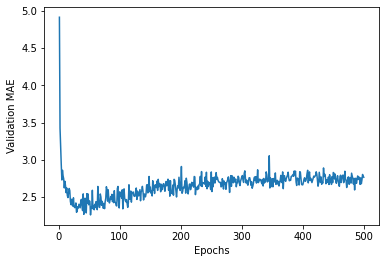

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

Hisotry 저장 및 불러오기 방법 => pickle

In [ ]:
import pickle

#saving file    #loagin 의 경우 'wb' => 'rb', file = pickle.load(f)
with open('Boston_housing_history', 'wb') as f:
  pickle.dump('history.history', f)

Model 저장 및 불러오기 방법

In [ ]:
#saving model
model.save('Boston_housing_model.h5')

#loading model
model_loaded = models.load_model('Boston_housing_model.h5')